### Data Preperation
### Week 9 and 10
### Submitter - Himanshu Singh
### Advanced Data Gathering and Visualization

Activity 7.01: Extracting the Top 100 e-books from Gutenberg
Project Gutenberg encourages the creation and distribution of eBooks by encouraging volunteer efforts to digitize and archive cultural works. This activity aims to scrape the URL of Project Gutenberg's Top 100 eBooks to identify the eBooks' links. It uses BeautifulSoup to parse the HTML and regular expression code to identify the Top 100 eBook file numbers. You can use these numbers to download the book into your local drive if you want.
These are the steps that will help you complete this activity:
* Import the necessary libraries, including regex and BeautifulSoup.
* Read the HTML from the URL.
* Write a small function to check the status of the web request.
* Decode the response and pass this on to BeautifulSoup for HTML parsing.
* Find all the href tags and store them in the list of links. Check what the list looks like – print the first 30 elements.
* Use a regular expression to find the numeric digits in these links. These are the file numbers for the top 100 eBooks.
* Initialize the empty list to hold the file numbers over an appropriate range and use regex to find the numeric digits in the link href string. Hint: Use the findall method.
* What does the soup object's text look like? Use the .text method and print only the first 2,000 characters (do not print the whole thing, as it is too long).
* Search in the extracted text (using a regular expression) from the soup object to find the names of the top 100 eBooks (yesterday's ranking).
* Create a starting index. It should point at the text Top 100 Ebooks yesterday. Use the splitlines method of soup.text. It splits the lines of text of the soup object.
* Run the for loop 1-100 to add the strings of the next 100 lines to this temporary list. Hint: use the splitlines method.
* Use a regular expression to extract only text from the name strings and append it to an empty list. Use match and span to find the indices and use them.
* Print the list of titles.

In [20]:
# Import the necessary libraries, including regex and BeautifulSoup.
# Read the HTML from the URL.
# Write a small function to check the status of the web request.
# Decode the response and pass this on to BeautifulSoup for HTML parsing.

import requests
import re
from bs4 import BeautifulSoup

# The URL for Project Gutenberg's Top 100 English Ebooks
url = 'https://www.gutenberg.org/browse/scores/top'

# Read the HTML from the URL
response = requests.get(url)

# Write a small function to check the status of the web request.
def check_status(response):
    """Checks the HTTP status code of the response."""
    if response.status_code == 200:
        print(f" Success! Status Code: {response.status_code}")
        return True
    else:
        print(f" Failed. Status Code: {response.status_code}")
        return False

# Check status and decode the response for BeautifulSoup
if check_status(response):
    html_content = response.content
    soup = BeautifulSoup(html_content, 'html.parser')
    print("BeautifulSoup object created successfully.")

 Success! Status Code: 200
BeautifulSoup object created successfully.



Extracting Book File Numbers

* Find all the href tags and store them in the list of links. Check what the list looks like – print the first 30 elements.
* Use a regular expression to find the numeric digits in these links. These are the file numbers for the top 100 eBooks.


In [21]:
# Find all the href tags and store them in the list of links.
links = []
for link in soup.find_all('a'):
    href = link.get('href')
    if href:
        links.append(href)

# Check what the list looks like – print the first 30 elements.
print(f"\nTotal links found: {len(links)}")
print("First 30 links:")
for i in range(30):
    print(links[i])

# Initialize the empty list to hold the file numbers.
file_numbers = []

# Use a regular expression to find the numeric digits in these links.
# Pattern: looks for '/ebooks/' followed by one or more digits (\d+).
pattern = re.compile(r'/ebooks/(\d+)')

# Use regex findall method to find the numeric digits in the link href string.
# Number 22 to 122 has the ebook links.
for i in range(22,122):
    link = links[i]
    #print(f"\nLink: {link}")
    match = pattern.findall(link)
    if match and match[0] not in file_numbers:
        # Only add unique file numbers to the list
        file_numbers.append(match[0])

# The Top 100 books are the first 100 unique file numbers found.
top_100_file_numbers = file_numbers[:100]

print(f"\nTotal unique file numbers found: {len(file_numbers)}")
print(f"Top 100 eBook File Numbers: {top_100_file_numbers[:100]}")


Total links found: 665
First 30 links:
/
/donate/
/about/
/about/contact_information.html
/about/background/
/help/mobile.html
/help/
/ebooks/offline_catalogs.html
/donate/
/browse/scores/top
/ebooks/categories
/ebooks/bookshelf/
/ebooks/
/browse/scores/top
/ebooks/categories
/about/pretty-pictures.html
#books-last1
#books-last7
#books-last30
#authors-last1
#authors-last7
#authors-last30
/ebooks/84
/ebooks/26471
/ebooks/2701
/ebooks/8492
/ebooks/1342
/ebooks/26225
/ebooks/1513
/ebooks/11

Total unique file numbers found: 100
Top 100 eBook File Numbers: ['84', '26471', '2701', '8492', '1342', '26225', '1513', '11', '28942', '100', '145', '2641', '43', '37106', '20968', '67979', '2554', '16389', '768', '1260', '394', '6761', '6593', '2160', '4085', '5197', '345', '1259', '22789', '174', '22788', '98', '28054', '16328', '39635', '26296', '844', '25344', '28761', '21436', '46', '1184', '1661', '22962', '1998', '2542', '26274', '1232', '6130', '4300', '12161', '64317', '41445', '2591', '76

* What does the soup object's text look like? Use the .text method and print only the first 2,000 characters (do not print the whole thing, as it is too long).
* Search in the extracted text (using a regular expression) from the soup object to find the names of the top 100 eBooks (yesterday's ranking).
* Create a starting index. It should point at the text Top 100 Ebooks yesterday. Use the splitlines method of soup.text. It splits the lines of text of the soup object.
* Run the for loop 1-100 to add the strings of the next 100 lines to this temporary list. Hint: use the splitlines method.
* Use a regular expression to extract only text from the name strings and append it to an empty list. Use match and span to find the indices and use them.
* Print the list of titles.Extracting EBook titles

In [22]:
# What does the soup object's text look like? Use the .text method and print only the first 2,000 characters.
soup_text = soup.text
print("\nFirst 2,000 characters of soup text:")
print(soup_text[:2000])

# Create a starting index. It should point at the text 'Top 100 Ebooks yesterday'.
lines = soup_text.splitlines()
raw_titles = []
start_index = -1

# Search for the start of the title list
for i, line in enumerate(lines):
    # Check for the list separator, which often contains the "Top 100 EBooks yesterday" text.
    if 'Top 100 EBooks yesterday' in line:
        start_index = i
        break

if start_index == -1:
    print("Error: Could not find 'Top 100 Ebooks yesterday' text.")
    # Exit if the key starting phrase is not found
    exit()

print(f"start_index : {start_index}")

# Run the for loop 1-100 to add the strings of the next 100 lines to this temporary list.
# The titles follow immediately after the index line.
for i in range(start_index + 1, start_index + 102):
    if i < len(lines):
        # We only add non-empty lines that aren't navigation links
        stripped_line = lines[i].strip()
        if stripped_line and not stripped_line.startswith('['):
             raw_titles.append(stripped_line)

# Use a regular expression to extract only text from the name strings and append it to an empty list.
final_titles = []
# Regex pattern: Captures the title text that sits between the rank number and the count number (in parentheses).
title_pattern = re.compile(r'^\d+\.\s+(.*)\s+\(\d+\)$')

for raw_title in raw_titles[:100]: # Ensure we only process up to 100
    match = title_pattern.match(raw_title)

    if match:
        # Extract the title (group 1)
        title = match.group(1).strip()
        final_titles.append(title)
    else:
        # Fallback for titles that might be cleaner or slightly different.
        # This uses .span() to find indices of the rank/count and slice the string.
        try:
            # Find the index of the rank (e.g., "1.")
            start_span = re.match(r'^\d+\.\s+', raw_title).span()[1]
            # Find the index of the download count (e.g., "(372)")
            end_span = re.search(r'\s+\(\d+\)$', raw_title).span()[0]

            # Extract the text between these two indices
            title_text = raw_title[start_span:end_span].strip()
            final_titles.append(title_text)
        except AttributeError:
             # If regex fails, fall back to the raw stripped title (will be slightly messy)
            final_titles.append(raw_title)

# Print the list of titles.
print("\n--- Top 100 English Ebook Titles (Yesterday) ---")
for i, title in enumerate(final_titles):
    print(f"{i+1:02d}. {title}")

print(f"\nSuccessfully extracted {len(final_titles)} titles.")


First 2,000 characters of soup text:




Top 100 | Project Gutenberg





































X

Go!







 Donate 





About▼

About Project Gutenberg 
Contact Us
History & Philosophy
Kindle & eReaders
Help Pages
Offline Catalogs
Donate



Frequently Downloaded
Main Categories
Reading Lists
Search Options



Frequently Downloaded
Main Categories



Frequently Viewed or Downloaded
Calculated from the number of times each eBook gets
downloaded. (Multiple downloads from the same Internet
address on the same day count as one download. Addresses
that download more than 100 eBooks in a day are considered
robots and are not counted.)

Downloaded Books
2025-11-151729656
last 7 days10342417
last 30 days38084452

Visualizations and graphs are available as
pretty pictures.


Top 100 EBooks: Yesterday - 7 days - 30 days
Top 100 Authors: Yesterday - 7 days - 30 days

Top 100 EBooks yesterday

Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (11415)
Spoon River 

Activity 7.02: Building Your Own Movie Database by Reading an API
In this activity, you will build a complete movie database by communicating and interfacing with a free API from the OMDb portal http://www.omdbapi.com/?. You will obtain a unique user key from the OMDb website that must be used when your program tries to access the API. Then, you will need to store this key value in a .json file.
The aims of this activity are as follows:
* To retrieve and print basic data about a movie (the title is entered by the user) from the web (the OMDb database).
* If a poster of the movie can be found, download the file and save it in a user-specified location.

These are the steps that will help you complete this activity:

* Import urllib.request, urllib.parse, urllib.error, and json.
* Load the secret API key (you have to get one from the OMDb website and use that; it has a daily limit of 1,000 API keys) from a JSON file, stored in the same folder, in a variable.Hint: Use json.loads().Students/users will need to obtain a key and store it in a JSON file.
* Obtain a key and store it in a JSON file as APIkeys.json.
* Open the APIkeys.json file.
* Assign the OMDb portal (http://www.omdbapi.com/?) as a string to a variable.
* Create a variable called apikey with the last portion of the URL (&apikey=secretapikey), where secretapikey is your own API key.
* Write a utility function called print_json to print the movie data from a JSON file (which we will get from the portal).
* Write a utility function to download a poster of the movie based on the information from the JSON dataset and save it in your local folder. Use the os module. The poster data is stored in a JSON key called Poster. Use the open Python command to open a file and write the poster data. Close the file after you're done. This function will save the poster data as an image file.
* Write a utility function called search_movie to search for a movie by its name, print the downloaded JSON data, and save the movie poster in the local folder. Use a try-except loop for this. Use the previously created serviceurl and apikey variables. You have to pass on a dictionary with a key, t, and the movie name as the corresponding value to the urllib.parse.urlencode() function and then add the serviceurl and apikey variables to the output of the function to construct the full URL. This URL will be used to access the data. The JSON data has a key called Response. If it is True, that means the read was successful. Check this before processing the data. If it's not successful, then print the JSON key Error, which will contain the appropriate error message returned by the movie database.

In [4]:
import urllib.request
import urllib.parse
import urllib.error
import json
import os
from pprint import pprint


# Load the secret API key from a JSON file.
try:
    with open('APIkeys.json') as f:
        API_KEYS = json.load(f)
    SECRET_API_KEY = API_KEYS.get('apikey', '')
    print("API Key loaded successfully.")
except FileNotFoundError:
    print("Error: APIkeys.json not found. Please create it and add your key.")
    exit()
except Exception as e:
    print(f"Error loading API Key: {e}")
    exit()

# Assign the OMDb portal as a string to a variable.
serviceurl = "http://www.omdbapi.com/?"

# Create the apikey variable with the last portion of the URL.
apikey = "&apikey=" + SECRET_API_KEY

# ---  Utility Functions ---

def print_json(data):
    """
    Utility function to print the movie data from a JSON response
    in a readable, formatted way.
    """
    print("\n--- Retrieved Movie Data ---")
    pprint(data)

def download_poster(movie_data):
    """
    Utility function to download a poster of the movie based on the
    information from the JSON dataset and save it locally.
    """
    poster_url = movie_data.get('Poster')
    title = movie_data.get('Title', 'unknown_movie').replace(' ', '_').replace(':', '')

    if poster_url and poster_url != 'N/A':
        # Determine file extension from the URL (e.g., .jpg)
        file_ext = os.path.splitext(poster_url)[1]
        if not file_ext:
            file_ext = '.jpg' # Default to jpg if extension is missing

        filename = f"{title}_poster{file_ext}"
        filepath = os.path.join(os.getcwd(), filename)

        try:
            # Use urlretrieve for downloading the file.
            # This handles reading the URL and writing the data to a file.
            urllib.request.urlretrieve(poster_url, filepath)
            print(f"\n Poster successfully downloaded and saved as: {filename}")
        except Exception as e:
            print(f"\n Error downloading poster from URL {poster_url}: {e}")

    else:
        print("\n No poster URL found for this movie.")

def search_movie(movie_name):
    """
    Searches for a movie by name, prints the JSON data, and saves the poster.
    """
    # 1. Prepare parameters for URL encoding
    # We pass a dictionary with key 't' (title) and the movie name.
    parms = {'t': movie_name}

    # 2. Encode parameters and construct the full URL
    url_parms = urllib.parse.urlencode(parms)
    full_url = serviceurl + url_parms + apikey

    print(f"\nSearching OMDb for: {movie_name}")
    print(f"Full API URL: {full_url}")

    try:
        # 3. Access the URL and read the response
        uh = urllib.request.urlopen(full_url)
        data = uh.read().decode()

        # 4. Parse the JSON response
        js = json.loads(data)

        # 5. Check the 'Response' key for success
        if js.get('Response') == 'True':
            print_json(js)
            download_poster(js)
        else:
            # If unsuccessful, print the error message
            error_message = js.get('Error', 'Unknown error during API response.')
            print(f"\n API Error: {error_message}")

    except urllib.error.URLError as e:
        print(f"\n URL Error: Could not connect to the API server: {e.reason}")
    except Exception as e:
        print(f"\n General Error during search: {e}")

# --- 3. Main Execution ---

if __name__ == '__main__':
    # Get user input for the movie title
    movie_title = input("\nEnter the movie title to search for: ")

    if movie_title:
        search_movie(movie_title)
    else:
        print("No movie title entered. Exiting.")

API Key loaded successfully.

Searching OMDb for: Varanasi
Full API URL: http://www.omdbapi.com/?t=Varanasi&apikey=c19d35e

--- Retrieved Movie Data ---
{'Actors': 'N/A',
 'Awards': 'N/A',
 'BoxOffice': 'N/A',
 'Country': 'France',
 'DVD': 'N/A',
 'Director': 'Basile Pierrat',
 'Genre': 'Short',
 'Language': 'English',
 'Metascore': 'N/A',
 'Plot': 'Varanasi is a psychedelic and spiritual trip into the heart of '
         'northern India. From the labyrinthine streets of New Delhi to the '
         'pyres of the Ganges river, you will meet some really strange '
         'peoples. Get ready for the trip.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMjFmZTUyMDEtM2FhYy00ZWNkLTk2ZjAtNmMyZDZmMmIyNTVjL2ltYWdlXkEyXkFqcGdeQXVyNzA1MjgxMzM@._V1_SX300.jpg',
 'Production': 'N/A',
 'Rated': 'N/A',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.4/10'}],
 'Released': '07 Oct 2016',
 'Response': 'True',
 'Runtime': 'N/A',
 'Title': 'Varanasi',
 'Type': 'movie',
 'Website': 'N/

Connect to an API of your choice and do a simple data pull - you can use any API - except the API you have selected for your project.
* In previous versions of this course we have always used Twitter, but with recent organizational changes at Twitter, it has become increasingly difficult to access the free APIs available at Twitter. You are more than welcome to try to use Twitter''s API for this portion of the assignment, but please note, there has been some inconsistency experienced when following along with their documentation posted.
* Connect to the API and do a "Get" call/operation on the API to return a subset of data from the API

In [9]:
# This code snippet will show the top 10 videos on Youtube.

import requests
import json
from pprint import pprint

# --- Activity: Simple Data Pull from YouTube API ---

# API Endpoint URL for YouTube Data API v3 Search
API_URL = "https://www.googleapis.com/youtube/v3/search"

def load_youtube_api_key():
    """Loads the YouTube API key from the JSON file."""
    try:
        with open('APIkeys.json') as f:
            API_KEYS = json.load(f)
        # Attempt to get the YouTube key
        return API_KEYS.get('youtube_api_key')
    except Exception:
        return 'youtube_api_key' # Return placeholder if file/key missing

def fetch_top_youtube_videos(query):
    """
    Performs a GET operation on the YouTube API and extracts a subset of the data
    for the top 10 videos matching the query.
    """
    YOUTUBE_API_KEY = load_youtube_api_key()

    if YOUTUBE_API_KEY == 'youtube_api_key':
        print(" ERROR: YouTube API Key not found. Please update 'APIkeys.json' with your key under the 'youtube_api_key' field.")
        return

    # Parameters for searching top 10 popular videos
    PARAMETERS = {
        "key": YOUTUBE_API_KEY,
        "part": "snippet",
        "q": query,
        "maxResults": 10,
        "type": "video",
        "order": "viewCount" # Sort by view count for popularity
    }

    print(f"Attempting GET request to YouTube API for query: '{query}'")

    try:
        # Perform the GET request
        response = requests.get(API_URL, params=PARAMETERS)

        # 1. Check the status code
        if response.status_code != 200:
            print(f" API Request Failed. Status Code: {response.status_code}")
            # The YouTube API often returns a detailed error in the response text
            print(f"Error Response: {response.text}")
            return

        # 2. Extract the JSON data
        data = response.json()

        # 3. Extract and print a subset of the data
        print("\n YouTube API Pull Successful (Status 200)")

        video_list = []
        for i, item in enumerate(data.get('items', [])):
            video_info = {
                "Rank": i + 1,
                "Title": item['snippet']['title'],
                "Channel": item['snippet']['channelTitle'],
                "Video ID": item['id']['videoId'],
                "Published": item['snippet']['publishedAt'].split('T')[0]
            }
            video_list.append(video_info)

        print("\n--- Subset of Extracted Data (Top 10 Videos) ---")
        if video_list:
            pprint(video_list)
        else:
            print("No videos found.")

    except requests.exceptions.RequestException as e:
        print(f" An error occurred during the API request: {e}")
    except json.JSONDecodeError:
        print(" Error: Could not decode JSON response.")
    except Exception as e:
        print(f" An unexpected error occurred: {e}")

if __name__ == '__main__':
    # Update the query to focus on finding popular videos
    search_query = "most viewed bollywood music videos"
    fetch_top_youtube_videos(search_query)

Attempting GET request to YouTube API for query: 'most viewed bollywood music videos'

 YouTube API Pull Successful (Status 200)

--- Subset of Extracted Data (Top 10 Videos) ---
[{'Channel': 'Geet MP3',
  'Published': '2019-08-13',
  'Rank': 1,
  'Title': 'Lehanga : Jass Manak (Official Video) Satti Dhillon - India&#39;s '
           'Most Viewed Song - Hit Punjabi Song',
  'Video ID': 'RKioDWlajvo'},
 {'Channel': 'T-Series',
  'Published': '2021-02-17',
  'Rank': 2,
  'Title': 'Lut Gaye (Full Song) Emraan Hashmi, Yukti | Jubin N, Tanishk B, '
           'Manoj M | Bhushan K | Radhika-Vinay',
  'Video ID': 'sCbbMZ-q4-I'},
 {'Channel': 'T-Series',
  'Published': '2019-09-26',
  'Rank': 3,
  'Title': 'Full Song: KHAIRIYAT (BONUS TRACK) | CHHICHHORE | Sushant, '
           'Shraddha | Pritam, Amitabh B|Arijit Singh',
  'Video ID': 'hoNb6HuNmU0'},
 {'Channel': 'T-Series',
  'Published': '2018-05-23',
  'Rank': 4,
  'Title': 'Official Video: Humnava Mere Song | Jubin Nautiyal | Manoj '
   

Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code if you are using PyCharm, otherwise if you submit a notebook file make sure your plots are visible in your notebook or PDF that you submit. You are free to use Matplotlib, Seaborn or another package if you prefer.


* Line
* Scatter
* Bar
* Histogram
* Density Plot
* Pie Chart

/var/folders/bm/ms9hwr3x2xx37xllx64tzxd80000gn/T/ipykernel_85961/40546997.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_profit.index, y=region_profit.values, palette='viridis')


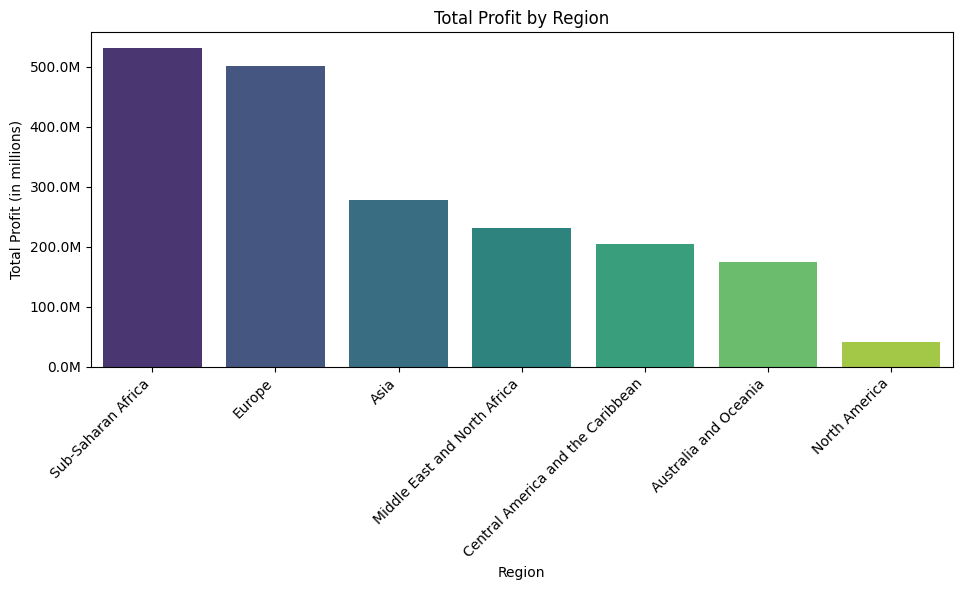

In [10]:
# We will use the sales_record.csv used in earlier assignments
#
# 1 . Bar Chart: Total Profit by Region

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("sales_record.csv")

# 1. Bar Chart: Total Profit by Region
region_profit = df.groupby('Region')['Total Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=region_profit.index, y=region_profit.values, palette='viridis')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit (in millions)')
plt.xticks(rotation=45, ha='right')
plt.gca().ticklabel_format(style='plain', axis='y') # Disable scientific notation
plt.tight_layout()

# Format Y-axis to show values in millions for better readability
# Note: This is a manual label formatting for demonstration purposes in a non-interactive environment
def millions_formatter(x, pos):
    return f'{x/1e6:.1f}M'

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

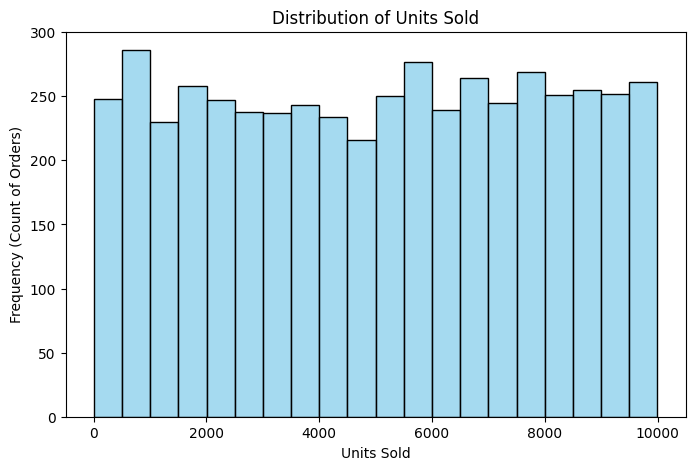

In [11]:
# 2. Histogram: Distribution of Units Sold

plt.figure(figsize=(8, 5))
# Using a log scale for the y-axis (count) can help show the distribution when one bin dominates,
# but we'll use a standard scale first to see the raw counts.
# If the distribution is very skewed, you might consider fewer bins or a log scale.
sns.histplot(df['Units Sold'], bins=20, kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency (Count of Orders)')
plt.show()

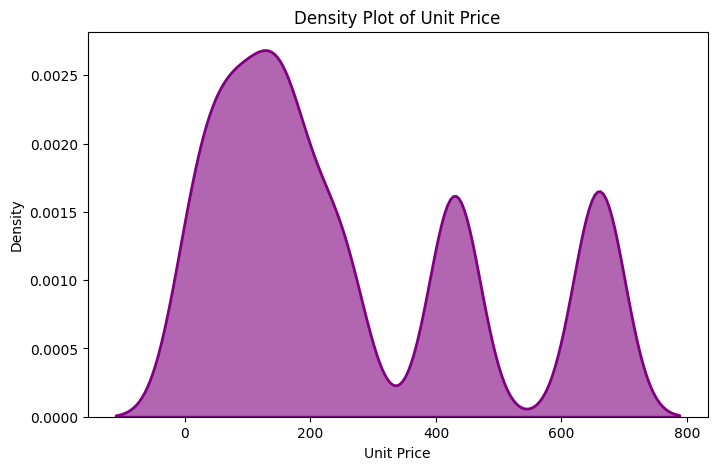

In [12]:
# 3. Density Plot: Distribution of Unit Price

plt.figure(figsize=(8, 5))
sns.kdeplot(df['Unit Price'], fill=True, color='purple', alpha=0.6, linewidth=2)
plt.title('Density Plot of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Density')
plt.show()